<a href="https://colab.research.google.com/github/suzuki-hikaru/matplotlib-practice/blob/master/18118078_%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 糖尿病データセットにおける「1年後の疾患進行の指標」を回帰分析によって予測し、説明変数を用いて回帰直線の式を報告せよ

## <font color="red">解答欄</font>

- 回帰直線の式：<br>
y = -24.58age -176.86sex + 542.07bmi + 278.68map -64.30tc -106.36ldl -203.48hdl+ 103.46tch + 455.48ltg + 57.87glu +152.86

<br>

- 決定係数：
<br>訓練データの決定係数 0.55<br>テストデータの決定係数 0.369


<br><br><br><br><br>

### 糖尿病データセットを読み込み、説明文を見る

In [ ]:
# このセルの内容は変更禁止

# 糖尿病データセットは load_diabetes を読み込む
from sklearn.datasets import load_diabetes
import pandas as pd

panda_box = load_diabetes()
print(panda_box.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### カラム名を変更して、データフレーム化

In [ ]:
# このセルの内容は変更禁止

# カラム名がわかりづらい（S1, S2, ..., S6）ので
col_names = ["age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"]

# 説明変数のデータをデータフレーム化
_df = pd.DataFrame(panda_box.data, columns=col_names)

# 目的変数のデータをデータフレーム化
target_df = pd.DataFrame(panda_box.target) 

# 目的変数のデータ + 説明変数のデータ
# 目的変数（1年後の疾患進行）を「Y」とする
diabetes_df = _df
diabetes_df['Y'] = target_df     

### データを可視化してみる

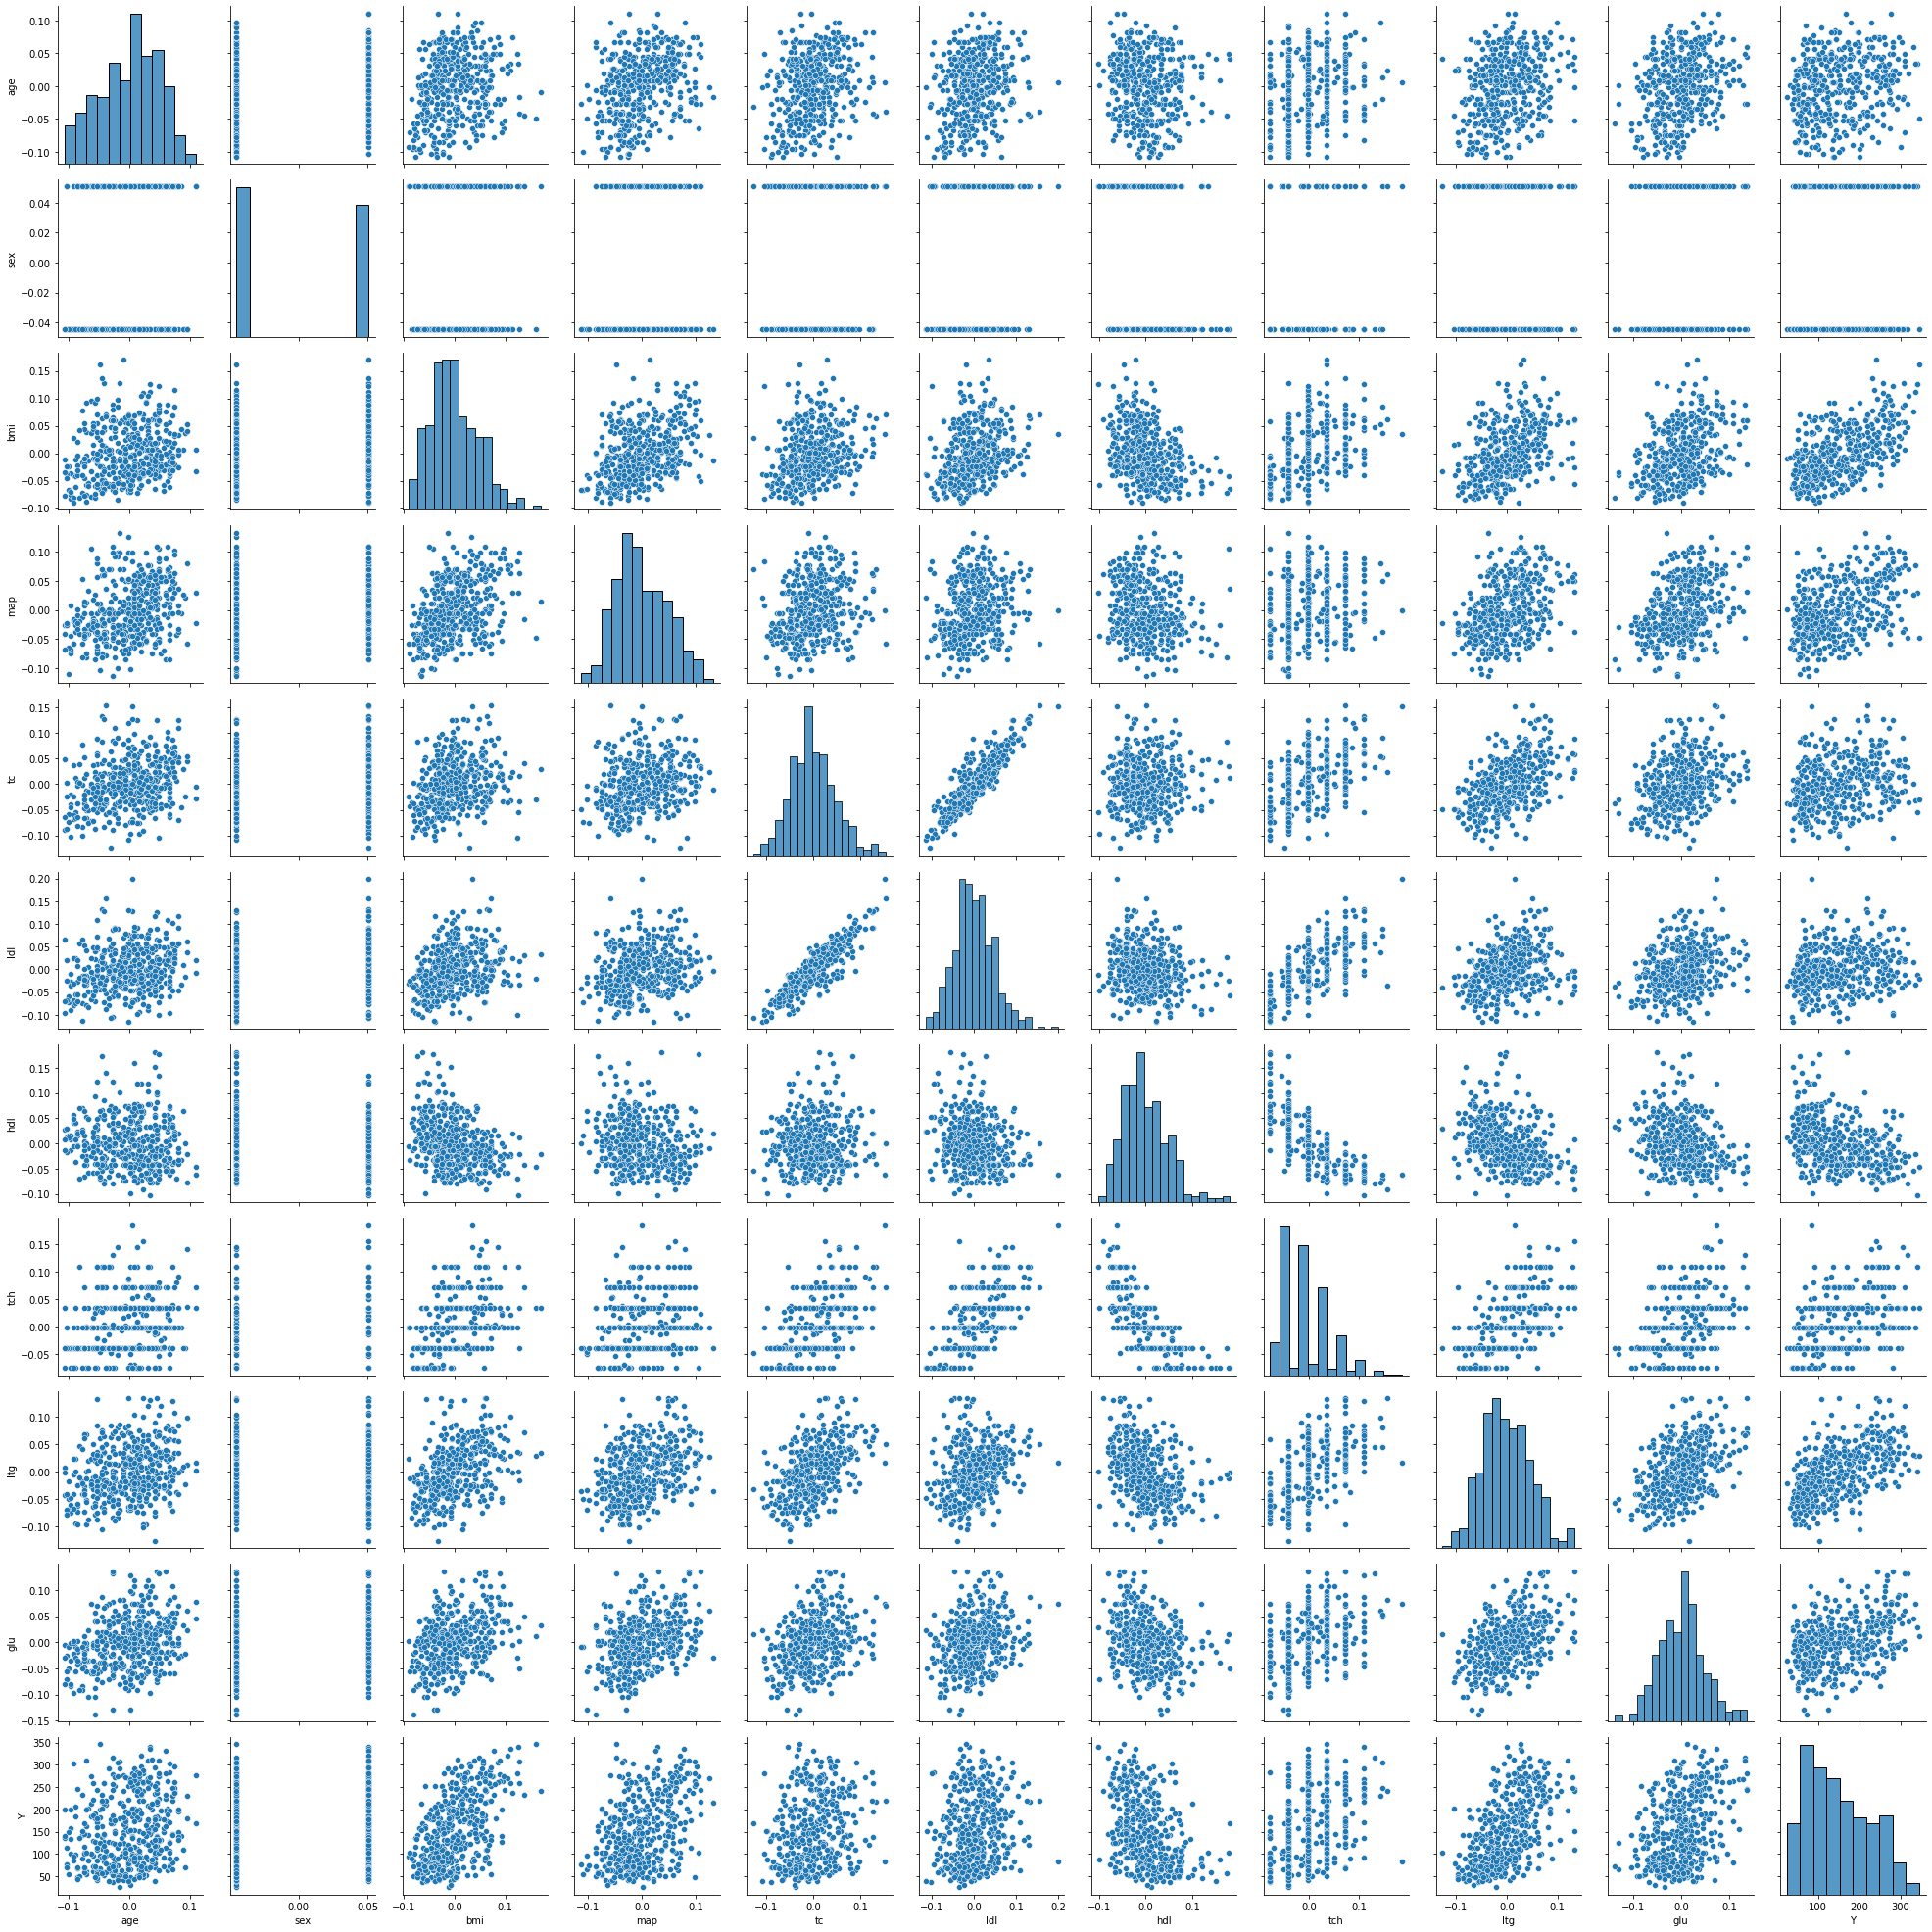

In [ ]:
# このセルの内容は変更禁止

import seaborn as sns 
import matplotlib.pyplot as plt
sns.pairplot(diabetes_df[diabetes_df.columns], height=2.5)
plt.tight_layout()
plt.show()

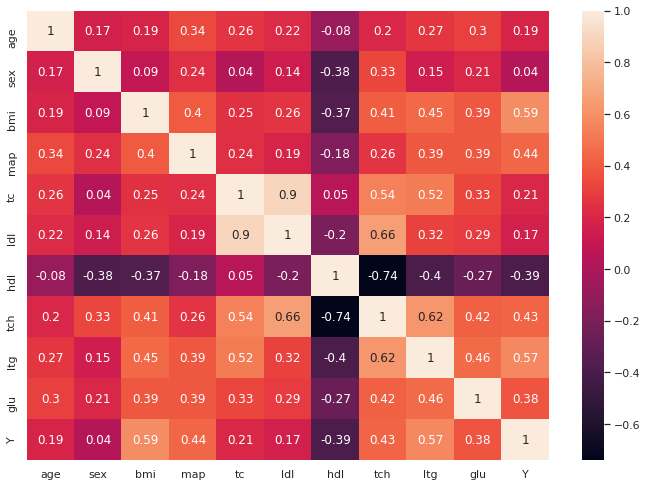

In [ ]:
# このセルの内容は変更禁止

sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = diabetes_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### 以下、Part1. ~ Part7. および 回帰分析① ~ ⑦ を参考に各自で取り組んでみてください
- 解答は解答欄にお願いします

### アウトライン

①下準備

②線形回帰

（reshapeの仕組みの確認）

③後ろ向き・前向きのアルゴリズムで決定係数の向上を目指す

④リッジ回帰とラッソ回帰で決定係数の向上を目指す

⑤式の作成 

### ①下準備

---


In [ ]:
# numpyのインポート
import numpy as np

In [ ]:
# データの表示
print(pd.DataFrame(panda_box.data, columns=col_names))

          age       sex       bmi  ...       tch       ltg       glu
0    0.038076  0.050680  0.061696  ... -0.002592  0.019908 -0.017646
1   -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068330 -0.092204
2    0.085299  0.050680  0.044451  ... -0.002592  0.002864 -0.025930
3   -0.089063 -0.044642 -0.011595  ...  0.034309  0.022692 -0.009362
4    0.005383 -0.044642 -0.036385  ... -0.002592 -0.031991 -0.046641
..        ...       ...       ...  ...       ...       ...       ...
437  0.041708  0.050680  0.019662  ... -0.002592  0.031193  0.007207
438 -0.005515  0.050680 -0.015906  ...  0.034309 -0.018118  0.044485
439  0.041708  0.050680 -0.015906  ... -0.011080 -0.046879  0.015491
440 -0.045472 -0.044642  0.039062  ...  0.026560  0.044528 -0.025930
441 -0.045472 -0.044642 -0.073030  ... -0.039493 -0.004220  0.003064

[442 rows x 10 columns]


In [ ]:
#欠損データの確認
print(_df.isnull().sum())
#欠損データの確認
print(target_df.isnull().sum())

age    0
sex    0
bmi    0
map    0
tc     0
ldl    0
hdl    0
tch    0
ltg    0
glu    0
Y      0
dtype: int64
0    0
dtype: int64


欠損値はない

### ②線形回帰

---


In [ ]:
# linear_modelのインポート
from sklearn import linear_model
# train_test_splitのインポート
from sklearn.model_selection import train_test_split

(xとyのreshapeの確認)

In [ ]:
X = panda_box.data #行列だから大文字
y = panda_box.target

In [ ]:
print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [ ]:
print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

yのreshapeが必要

In [ ]:
y = panda_box.target.reshape(-1,1)

In [ ]:
# 使いそうなので関数化
def change_all():
  global X,y
  X = panda_box.data #行列だから大文字
  y = panda_box.target.reshape(-1,1)
  print("確認")
  print(X[1])

＊random_stateの指定忘れに注意↓

In [ ]:
#訓練データとテストデータに分割(テストデータ25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
#線形回帰を作成して訓練
reg = linear_model.LinearRegression().fit(X_train,y_train)

In [ ]:
#現段階のテストデータの決定係数を求める
print(reg.score(X_test, y_test))

0.35940090989715534


In [ ]:
#切片と重みを確認
print("重み")
print(reg.coef_)
print("切片")
print(reg.intercept_)

重み
[[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
   261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354]]
切片
[153.06798218]


In [ ]:
# 確認用に関数作成
def confirm(a, b, c, d, model):
  print("--------------------------------------------")
  #現段階の決定係数を求める
  print("訓練データの決定係数")
  print(round(model.score(a, c),3))
  print("テストデータの決定係数")
  print(round(model.score(b,d),3))
  # 説明変数の確認
  print("\n各説明変数の重み")
  print(model.coef_)
  print("")

In [ ]:
confirm(X_train, X_test, y_train, y_test, reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
--------------------------------------------
訓練データの決定係数
0.555
テストデータの決定係数
0.359

各説明変数の重み
[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354]



### (reshapeの仕組みの確認)

 ---


In [ ]:
test=[1,2,3,4,]

In [ ]:
type(test)

list

In [ ]:
test = np.array([1, 2, 3])

In [ ]:
print(test)

[1 2 3]


In [ ]:
type(test)

numpy.ndarray

In [ ]:
test=test.reshape(-1,1)

In [ ]:
print(test)

[[1]
 [2]
 [3]]


In [ ]:
type(test)

numpy.ndarray

### ③後ろ向き・前向きのアルゴリズムで決定係数の向上を目指す

---



In [ ]:
# すべての列がある状態にする(関数ver)
change_all()

確認
[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06832974 -0.09220405]


In [ ]:
# すべての列がある状態にする
X = panda_box.data #行列だから大文字
y = panda_box.target
print(X[1])

[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06832974 -0.09220405]


In [ ]:
#訓練
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
reg = linear_model.LinearRegression().fit(X_train,y_train)

In [ ]:
# 決定係数の確認
print("0:9")
confirm(X_train, X_test, y_train, y_test, reg)

0:9
--------------------------------------------
訓練データの決定係数
0.555
テストデータの決定係数
0.359

各説明変数の重み
[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354]



### ③-1 後ろ向き

yとの相関が最も小さいsexを取り除く

In [ ]:
#remove sex 
X1 = panda_box.data[:,[0,2,3,4,5,6,7,8,9]]
y = panda_box.target
# removeの確認
print("remove前")
print(X[1])
print("remove後")
print(X1[1])

remove前
[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06832974 -0.09220405]
remove後
[-0.00188202 -0.05147406 -0.02632783 -0.00844872 -0.01916334  0.07441156
 -0.03949338 -0.06832974 -0.09220405]


In [ ]:
#訓練
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.25, random_state=0)
reg1 = linear_model.LinearRegression().fit(X1_train,y1_train)

In [ ]:
# 決定係数の確認
print("0,2,3,4,5,6,7,8,9")
confirm(X1_train, X1_test, y1_train, y1_test, reg1)

0,2,3,4,5,6,7,8,9
--------------------------------------------
訓練データの決定係数
0.543
テストデータの決定係数
0.325

各説明変数の重み
[ -55.24480166  629.27312403  255.42663553 -478.03988396  200.04976555
   15.50420937   96.89528793  703.32872379    4.72764489]



小さくなった…

次に多重共線性を取り除く
tcとldlの多重共線性（0.9）を取り除くことを試みるが、tcよりldlのほうがyとの相関係数が小さいため、ldlを取り除き多重共線性を排除する

In [ ]:
#remove ldl
X2 = panda_box.data[:,[0,1,2,3,4,6,7,8,9]]
y = panda_box.target
# removeの確認
print("remove前[1]")
print(X[1])
print("remove後[1]")
print(X2[1])

remove前[1]
[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06832974 -0.09220405]
remove後[1]
[-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872  0.07441156
 -0.03949338 -0.06832974 -0.09220405]


In [ ]:
#訓練
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.25, random_state=0)
reg2 = linear_model.LinearRegression().fit(X2_train,y2_train)

In [ ]:
# 決定係数の確認
print("0,1,2,3,4,6,7,8,9")
confirm(X2_train, X2_test, y2_train, y2_test, reg2)

0,1,2,3,4,6,7,8,9
--------------------------------------------
訓練データの決定係数
0.555
テストデータの決定係数
0.353

各説明変数の重み
[ -40.16366024 -205.90203339  600.51141821  299.04601379 -248.80066777
 -137.53605728  111.99893759  583.9864673    28.97993017]



低くなった。前向きのほうがよさそう？

### ③-2 前向き　

説明変数を取り除くと決定係数が小さくなる...
別の方法を試みます

### ④リッジ回帰とラッソ回帰で決定係数の向上を目指す

---


In [ ]:
# モデルのインポート
from sklearn.linear_model import Ridge, Lasso

④-1 リッジ回帰

In [ ]:
ridge = Ridge().fit(X_train,y_train)

In [ ]:
ridge_001 = Ridge(alpha=0.01).fit(X_train,y_train)
ridge_01 = Ridge(alpha=0.1).fit(X_train,y_train)

In [ ]:
print("ridge_001")
confirm(X_train, X_test, y_train, y_test, ridge_001)
print("ridge_01")
confirm(X_train, X_test, y_train, y_test, ridge_01)

ridge_001
--------------------------------------------
訓練データの決定係数
0.555
テストデータの決定係数
0.357

各説明変数の重み
[ -39.10301115 -203.435885    592.25342919  297.25810373 -252.42469968
   20.90559566 -145.19575989   97.03282049  580.07806371   32.94492155]

ridge_01
--------------------------------------------
訓練データの決定係数
0.55
テストデータの決定係数
0.369

各説明変数の重み
[ -24.58112097 -176.85826907  542.06560954  278.6835639   -64.29865927
 -106.35897966 -203.48234996  103.46110928  455.4820832    57.8681161 ]



α=0.1の時少し決定係数が大きくなった

④-2ラッソ回帰

In [ ]:
lasso = Lasso().fit(X_train,y_train)

In [ ]:
print("lasso")
confirm(X_train, X_test, y_train, y_test, lasso)

lasso
--------------------------------------------
訓練データの決定係数
0.414
テストデータの決定係数
0.278

各説明変数の重み
[  0.          -0.         442.67992538   0.           0.
   0.          -0.           0.         330.76014648   0.        ]



In [ ]:
lasso_001 = Lasso(alpha=0.01).fit(X_train,y_train)
lasso_01 = Lasso(alpha=0.1).fit(X_train,y_train)

In [ ]:
print("lasso_001")
confirm(X_train, X_test, y_train, y_test, lasso_001)
print("lasso_01")
confirm(X_train, X_test, y_train, y_test, lasso_01)

lasso_001
--------------------------------------------
訓練データの決定係数
0.555
テストデータの決定係数
0.354

各説明変数の重み
[ -33.79352021 -197.9025794   599.15347078  291.94888784 -221.41590139
    0.         -160.36811376   79.23177224  579.14982729   25.45472915]

lasso_01
--------------------------------------------
訓練データの決定係数
0.548
テストデータの決定係数
0.355

各説明変数の重み
[  -0.         -129.78400011  592.20328049  240.12404875  -41.64058526
  -47.62797321 -219.10436344    0.          507.36252305    0.        ]



ラッソ回帰は微妙..
やり方がよくなさそう

### ⑤式の作成

---


一番過学習がなさそう＋テストデータの決定値が大きい<br>
α=0.1のリッジ回帰を採用する

カラム名 ["age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"]

In [ ]:
# 佐俣の式を改良
if ridge_01.intercept_ > 0:
  intercept = "+{:.2f}" .format(ridge_01.intercept_)
else:
  intercept = "{:.2f}" .format(ridge_01.intercept_)

print()
print("y = {:.2f}" .format(ridge_01.coef_[0]) + "age {:.2f}"  .format(ridge_01.coef_[1]) + "sex {:.2f}"  .format(ridge_01.coef_[2]) + "bmi {:.2f}"  .format(ridge_01.coef_[3]) + "map {:.2f}"  .format(ridge_01.coef_[4]) + "tc {:.2f}"  .format(ridge_01.coef_[5]) +  "ldl{:.2f}" .format(ridge_01.coef_[6])+  "hdl{:.2f}".format(ridge_01.coef_[7])+ "tch{:.2f}" .format(ridge_01.coef_[8])+  "ltg{:.2f}".format(ridge_01.coef_[9])+ "glu " + intercept)


y = -24.58age -176.86sex 542.07bmi 278.68map -64.30tc -106.36ldl-203.48hdl103.46tch455.48ltg57.87glu +152.86


In [ ]:
print("ridge_01")
confirm(X_train, X_test, y_train, y_test, ridge_01)

ridge_01
--------------------------------------------
訓練データの決定係数
0.55
テストデータの決定係数
0.369

各説明変数の重み
[ -24.58112097 -176.85826907  542.06560954  278.6835639   -64.29865927
 -106.35897966 -203.48234996  103.46110928  455.4820832    57.8681161 ]

